In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('adverse_effect_1.csv')
df.head(3)

,ItemID,title,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy
0,7985785,anesthesia management in 14 cases of cesarean ...,0,0,8,0,0,0,0,0,0,0,0,0,0
1,4837660,human papillomavirus type 18 infection in a fe...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4466444,the acceleration of glucose accumulation in re...,0,0,0,0,0,0,0,0,0,3,3,0,0


In [ ]:
df['total'] = df.iloc[:,1:].sum(axis=1)
df.head(3)

,ItemID,title,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy,total
0,7985785,anesthesia management in 14 cases of cesarean ...,0,0,8,0,0,0,0,0,0,0,0,0,0,8
1,4837660,human papillomavirus type 18 infection in a fe...,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4466444,the acceleration of glucose accumulation in re...,0,0,0,0,0,0,0,0,0,3,3,0,0,6


In [ ]:
df['isFound'] = df['total'].apply(lambda x: 1 if x>0 else 0)
df.head(3)

,ItemID,title,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy,total,isFound
0,7985785,anesthesia management in 14 cases of cesarean ...,0,0,8,0,0,0,0,0,0,0,0,0,0,8,1
1,4837660,human papillomavirus type 18 infection in a fe...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4466444,the acceleration of glucose accumulation in re...,0,0,0,0,0,0,0,0,0,3,3,0,0,6,1


In [ ]:
df.iloc[:,2:].apply(sum).sort_values(ascending=True)

complicacy                    0
chemically_induced            5
pharmacological_action       26
drug_effect                 136
adverse_drug_event          285
complexity                  644
poisoning                  1251
adverse_reaction           1947
adverse_effect             4055
isFound                    5173
side_effect                8633
adverse_event             16283
complication              22513
adverse                   28101
total                     83879
dtype: int64

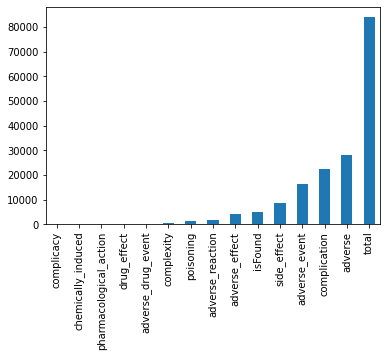

In [ ]:
df.iloc[:,2:].apply(sum).sort_values(ascending=True).plot(kind='bar')

In [ ]:
def df_isfound(x):
  return 1 if x>0 else 0

In [ ]:
df_new = df.iloc[:,2:-2].applymap(df_isfound)
df_new.head()

,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,1,1,0,0


In [ ]:
df_new.apply(sum).sort_values(ascending=True)

complicacy                   0
chemically_induced           4
pharmacological_action      21
drug_effect                 84
adverse_drug_event          90
poisoning                  179
complexity                 220
adverse_reaction           572
adverse_effect            1423
side_effect               2095
adverse_event             2521
complication              2911
adverse                   3608
dtype: int64

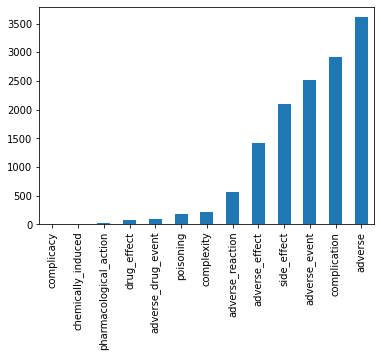

In [ ]:
df_new.apply(sum).sort_values(ascending=True).plot(kind='bar')

In [ ]:
df_mod = pd.read_csv('adverse_effect_mod.csv')
df_mod.head(3)

,ItemID,title,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy
0,7985785,anesthesia management in 14 cases of cesarean ...,0,0,8,0,0,0,0,0,0,0,0,0,0
1,4837660,human papillomavirus type 18 infection in a fe...,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4466444,the acceleration of glucose accumulation in re...,0,0,0,0,0,0,0,0,0,2,2,0,0


In [ ]:
df_mod = df_mod.iloc[:,2:].applymap(df_isfound)

In [ ]:
df_mod.iloc[:,:-1].apply(sum).sort_values(ascending=True)

chemically_induced           2
pharmacological_action      10
adverse_drug_event          33
drug_effect                 48
complexity                  94
poisoning                  107
adverse_reaction           365
adverse_effect             994
side_effect               1535
adverse_event             2066
complication              2213
adverse                   2940
dtype: int64

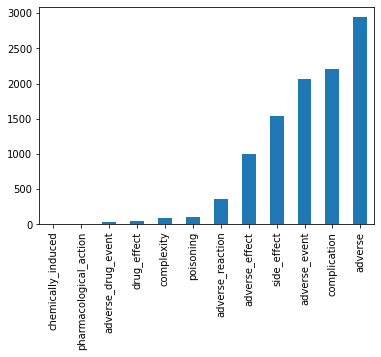

In [ ]:
df_mod.iloc[:,:-1].apply(sum).sort_values(ascending=True).plot(kind='bar')

In [ ]:
df_mod['total'] = df_mod.iloc[:,1:].sum(axis=1)
df_mod.head(3)

,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy,total
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,2


In [ ]:
df_mod['isFound'] = df_mod['total'].apply(lambda x: 1 if x>0 else 0)
df_mod.head(3)

,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy,total,isFound
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,2,1


In [ ]:
df_mod.insert(0, 'ItemID', df['ItemID'])

In [ ]:
df_mod

,ItemID,chemically_induced,adverse_effect,complication,poisoning,drug_effect,side_effect,adverse_reaction,pharmacological_action,adverse_drug_event,adverse_event,adverse,complexity,complicacy,total,isFound
0,7985785,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
1,4837660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4466444,0,0,0,0,0,0,0,0,0,1,1,0,0,2,1
3,8620634,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
4,8420016,0,1,1,0,0,1,0,0,0,1,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,6314919,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6821,7303324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6822,6259704,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6823,6379879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Article Count')

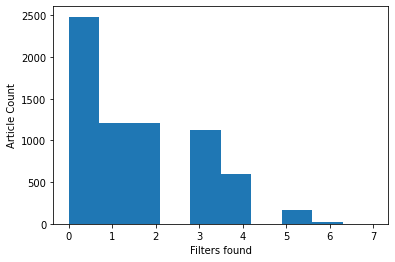

In [ ]:
plt.hist(df_mod['total'])
plt.xlabel('Filters found')
plt.ylabel('Article Count')

In [ ]:
def sum_f(count):
  return sum(df_mod['total'] == count)

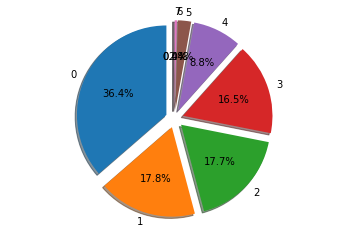

In [ ]:
labels = '0', '1', '2', '3', '4', '5', '6', '7'
sizes = [sum_f(k) for k in range(8)]
explode = (0.1,)*8

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
# df_mod.to_csv('adverse_effect_analysis.csv')